# Super-Resolution z wykorzystaniem modeli ESPCN, RDN, WDSR A, WDSR B, SRGAN - porównanie

ESPCN - Image Super-Resolution using an Efficient Sub-Pixel CNN, opracowane na podstawie artykułu https://arxiv.org/pdf/1609.05158

RDN - Residual Dense Network for Image Super-Resolution, opracowane na podstawie artykułu https://arxiv.org/abs/1802.08797

WDSR(A,B) - Wide Activation for Efficient and Accurate Image Super-Resolution, opracowane na podstawie artykułu https://arxiv.org/abs/1808.08718

SRGAN - Generative Adversarial Aetwork (GAN) for Image Super-Resolution (SR), opracowane na podstawie artykułu Photo-Realistic Single Image Super-Resolution Using a Generative Adversarial Network (https://arxiv.org/abs/1609.04802)


In [ ]:
pip install tensorflow-addons

     |████████████████████████████████| 686kB 8.2MB/s 


## 1. Zestaw danych

Został wykorzystany zestaw danych DIV2K, dostępny pod adresem: http://data.vision.ee.ethz.ch/cvl/DIV2K.

In [ ]:
import os
import matplotlib.pyplot as plt
from zestawy_danych import DIV2K #służy do pobierania zdjęć, zdjęcia zostaną umieszczone w folderze dane

%matplotlib inline

In [ ]:
train_data = DIV2K(scale=2, subset='train', downgrade='bicubic') #dane treningowe
valid_data = DIV2K(scale=2, subset='valid', downgrade='bicubic') #dane validacyjne

In [ ]:
train_ds = train_data.dataset(batch_size=16, random_transform=True)
valid_ds = valid_data.dataset(batch_size=1)

925392896/925390592 [==============================] - 53s 0us/step
Caching decoded images in demo/div2k/caches/DIV2K_train_LR_bicubic_X2.cache ...
Cached decoded images in demo/div2k/caches/DIV2K_train_LR_bicubic_X2.cache.
117768192/117763600 [==============================] - 8s 0us/step
Caching decoded images in demo/div2k/caches/DIV2K_valid_LR_bicubic_X2.cache ...
Cached decoded images in demo/div2k/caches/DIV2K_valid_LR_bicubic_X2.cache.


## 2. Trening

Trening dla każdego modelu ma 2000 kroków. 
Gdy PSNR ulega poprawie, checkpoint jest zapisywany.

In [ ]:
from modele.ESPCN import espcn #model espcn
from modele.RDN import rdn #model rdn
from modele.WDSR import wdsr_a, wdsr_b
from modele.SRGAN import srgan
from trainings import ESPCNTrainer, RDNTrainer, WdsrTrainer, SrganTrainer, SrganGeneratorTrainer #treningi modeli

### 2.1 ESPCN 
Wagi z trenowanego modelu zapisane zostaną do pliku weights/espcn/weights.h5. 

In [ ]:
#stworzenie pliku weights.h5 w katalogu weights/espcn
wagi_katalog_ESPCN = f'weights/espcn'
wagi_plik_ESPCN = os.path.join(wagi_katalog_ESPCN, 'weights.h5')

os.makedirs(wagi_katalog_ESPCN, exist_ok=True)

In [ ]:
trainer_ESPCN = ESPCNTrainer(model=espcn(scale=2, num_res_blocks=32), 
                      checkpoint_dir=f'.ckpt/espcn')

In [ ]:
trainer_ESPCN.train(train_ds,
              valid_ds.take(10),
              steps=2000, 
              evaluate_every=100, 
              save_best_only=True)

In [ ]:
#zapisanie wag do pliku
trainer_ESPCN.model.save_weights(wagi_plik_ESPCN)

### 2.2 RDN
Wagi z trenowanego modelu zapisane zostaną do pliku weights/rdn/weights.h5. 

In [ ]:
#stworzenie pliku weights.h5 w katalogu weights/rdn
wagi_katalog_RDN = f'weights/rdn'
wagi_plik_RDN = os.path.join(wagi_katalog_RDN, 'weights.h5')

os.makedirs(wagi_katalog_RDN, exist_ok=True)

In [ ]:
trainer_RDN = RDNTrainer(model=rdn(scale=2, num_res_blocks=32), 
                      checkpoint_dir=f'.ckpt/rdn')

In [ ]:
trainer_RDN.train(train_ds,
              valid_ds.take(10),
              steps=2000, 
              evaluate_every=100, 
              save_best_only=True)

In [ ]:
#zapisanie wag do pliku
trainer_RDN.model.save_weights(wagi_plik_RDN)

### 2.3 WDSR_A
Wagi z trenowanego modelu zapisane zostaną do pliku weights/wdsr_a/weights.h5. 

In [ ]:
#stworzenie pliku weights.h5 w katalogu weights/espcn
wagi_katalog_WDSR_A = f'weights/wdsr_a'
wagi_plik_WDSR_A = os.path.join(wagi_katalog_WDSR_A, 'weights.h5')

os.makedirs(wagi_katalog_WDSR_A, exist_ok=True)

In [ ]:
trainer_WDSR_A = WdsrTrainer(model=wdsr_a(scale=2, num_res_blocks=32), 
                      checkpoint_dir=f'.ckpt/wdsr_a')

In [ ]:
trainer_WDSR_A.train(train_ds,
              valid_ds.take(10),
              steps=2000, 
              evaluate_every=100, 
              save_best_only=True)

In [ ]:
#zapisanie wag do pliku
trainer_WDSR_A.model.save_weights(wagi_plik_WDSR_A)

### 2.4 WDSR_B
Wagi z trenowanego modelu zapisane zostaną do pliku weights/wdsr_b/weights.h5. 

In [ ]:
#stworzenie pliku weights.h5 w katalogu weights/espcn
wagi_katalog_WDSR_B = f'weights/wdsr_a'
wagi_plik_WDSR_B = os.path.join(wagi_katalog_WDSR_B, 'weights.h5')

os.makedirs(wagi_katalog_WDSR_B, exist_ok=True)

In [ ]:
trainer_WDSR_B = WdsrTrainer(model=wdsr_b(scale=2, num_res_blocks=32), 
                      checkpoint_dir=f'.ckpt/wdsr_b')

In [ ]:
trainer_WDSR_B.train(train_ds,
              valid_ds.take(10),
              steps=2000, 
              evaluate_every=100, 
              save_best_only=True)

In [ ]:
#zapisanie wag do pliku
trainer_WDSR_B.model.save_weights(wagi_plik_WDSR_B)

### 2.5 SRGAN
Wagi z trenowanego modelu zapisane zostaną do pliku weights/srgan/weights.h5. 

In [ ]:
#stworzenie pliku weights.h5 w katalogu weights/espcn
# Location of model weights (needed for demo)
weights_dir = 'weights/srgan'
weights_file = lambda filename: os.path.join(weights_dir, filename)

os.makedirs(weights_dir, exist_ok=True)

In [ ]:
pre_trainer = SrganGeneratorTrainer(model=generator(), checkpoint_dir=f'.ckpt/pre_generator')
pre_trainer.train(train_ds,
                  valid_ds.take(10),
                  steps=2000, 
                  evaluate_every=100, 
                  save_best_only=False)

pre_trainer.model.save_weights(weights_file('pre_generator.h5'))

gan_generator = generator()
gan_generator.load_weights(weights_file('pre_generator.h5'))

gan_trainer = SrganTrainer(generator=gan_generator, discriminator=discriminator())
gan_trainer.train(train_ds, steps=2000)

In [ ]:
gan_trainer.generator.save_weights(weights_file('gan_generator.h5'))
gan_trainer.discriminator.save_weights(weights_file('gan_discriminator.h5'))

## 3. Wyniki
Poniżej przedstawione są wyniki działania na kilku obrazach.

In [ ]:
model_ESPCN = espcn(scale=4, num_res_blocks=32)
model_ESPCN.load_weights('weights/ESPCN_4/weights.h5')

model_RDN = rdn(scale=4, num_res_blocks=32)
model_RDN.load_weights('weights/RDN_4/weights.h5')

model_WDSR_A = wdsr_a(scale=4, num_res_blocks=32)
model_WDSR_A.load_weights('weights/WDSR_A_4/weights.h5')

model_WDSR_B = wdsr_b(scale=4, num_res_blocks=32)
model_WDSR_B.load_weights('weights/WDSR_B_4/weights.h5')

model_SRGAN = srgan()
model_SRGAN.load_weights('weights/SRGAN_4/weights.h5')

In [ ]:
import tensorflow as tf
import numpy as np
from trainings import resolve
from showingss import load_image, plot_sample
from miary import ssim
import cv2

def plot_result(lr_image_path, hr_image_path, sr_image_path):
    lr = load_image(lr_image_path)
    hr = load_image(hr_image_path)
    sr = resolve(model_WDSR_A, tf.expand_dims(lr, axis=0))[0]
    cv2.imwrite(sr_image_path, np.float32(sr))
    ss = ssim(hr_image_path, sr_image_path)
    plot_sample(lr, hr, sr)
    return lr, hr, sr


Wyniki dla całego zbioru danych

In [ ]:
import tensorflow as tf
import numpy as np
from trainings import resolve
from showings import load_image, plot_sample
import time
from miary import ssim
import cv2
score_sum = []
elapsed_time_sum = []
ssim_sum = []
for image_id in range (1,900):
    if image_id in range (1,9):
        lr = load_image(f'demo/div2k/images/DIV2K_train_LR_bicubic/X4/000{image_id}x4.png')
        hr = load_image(f'demo/div2k/images/DIV2K_train_HR/000{image_id}.png')
        hr_image_path = f'demo/div2k/images/DIV2K_train_HR/000{image_id}.png'
    if image_id in range (10,99):
        lr = load_image(f'demo/div2k/images/DIV2K_train_LR_bicubic/X4/00{image_id}x4.png')
        hr = load_image(f'demo/div2k/images/DIV2K_train_HR/00{image_id}.png')
        hr_image_path = f'demo/div2k/images/DIV2K_train_HR/00{image_id}.png'
    if image_id in range (100,800):
        lr = load_image(f'demo/div2k/images/DIV2K_train_LR_bicubic/X4/0{image_id}x4.png')
        hr = load_image(f'demo/div2k/images/DIV2K_train_HR/0{image_id}.png')
        hr_image_path = f'demo/div2k/images/DIV2K_train_HR/0{image_id}.png'
    if image_id in range (801,900):
        lr = load_image(f'demo/div2k/images/DIV2K_valid_LR_bicubic/X4/0{image_id}x4.png')
        hr = load_image(f'demo/div2k/images/DIV2K_valid_HR/0{image_id}.png')
        hr_image_path = f'demo/div2k/images/DIV2K_valid_HR/0{image_id}.png'
    start_time = time.time() 
    sr = resolve(model_RDN, tf.expand_dims(lr, axis=0))[0]
    elapsed_time = time.time() - start_time
    sr_image_path = f'demo/SR/0{image_id}.png'
    cv2.imwrite(sr_image_path, np.float32(sr))
    score = tf.image.psnr(hr, sr, 255)
    ssim_score = ssim(hr_image_path, sr_image_path)
    score_sum.append(score)
    ssim_sum.append(ssim_score)
    elapsed_time_sum.append(elapsed_time)
print('średnia wartość PSNR:', np.mean(score_sum, axis=0))
print('odchylenie standardowe PSNR:', np.std(score_sum, axis=0))
ssim_sum = np.array(ssim_sum).astype(np.float)
print('średnia wartość SSIM:', np.mean(ssim_sum, axis=0))
print('odchylenie standardowe SSIM:', np.std(ssim_sum, axis=0))
print('średnia wartość czasu przetwarzania:', np.mean(elapsed_time_sum, axis=0))
print('odchylenie standardowe czasu przetwarzania:', np.std(elapsed_time_sum, axis=0))

/content/miary.py:18: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  (score, diff) = compare_ssim(grayA, grayB, full=True)


średnia wartość PSNR: 25.264874
odchylenie standardowe PSNR: 3.3641272
średnia wartość SSIM: 0.7437014287301433
odchylenie standardowe SSIM: 0.10560973768708891
średnia wartość czasu przetwarzania: 0.05905972890249216
odchylenie standardowe czasu przetwarzania: 0.004870236413115624


# Działanie algorytmu ESPCN na przykładowym zdjęciu

/content/miary.py:18: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  (score, diff) = compare_ssim(grayA, grayB, full=True)


SSIM: 0.2742271307561162


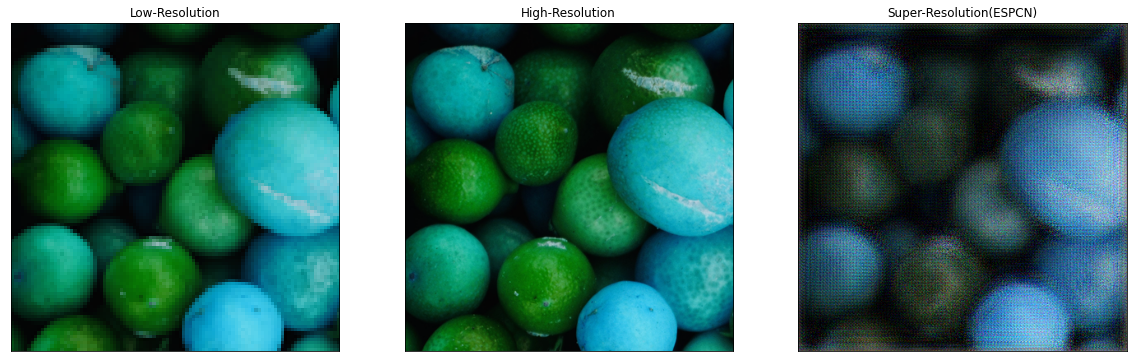

In [ ]:
lr, hr, sr3 = plot_result('LR/0802_lr.png', 'LR/0802_hr.png', 'LR/0802_sr.png')

# Działanie algorytmu SRGAN na przykładowym zdjęciu

/content/miary.py:18: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  (score, diff) = compare_ssim(grayA, grayB, full=True)


SSIM: 0.7067190859379485


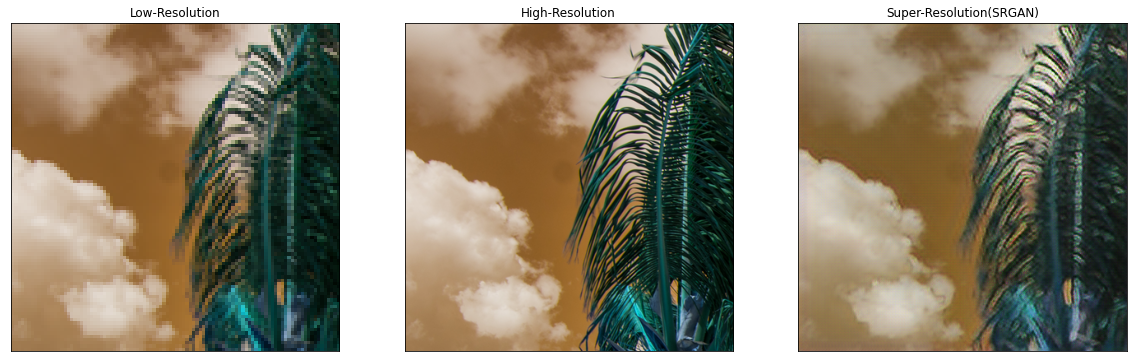

In [ ]:
lr, hr, sr3 = plot_result('LR/0806_lr.png', 'LR/0806_hr.png', 'LR/0806_sr.png')

## 4. Eksperyment
Poniżej znajdują się wyniki eksperymentu naukowego, który ma na celu nałożenie na obraz kilku algorytmów z rodziny Super-Rozdzielczości

In [ ]:
model_ESPCN_2 = espcn(scale=2, num_res_blocks=32)
model_ESPCN_2.load_weights('weights/ESPCN/weights.h5')

model_RDN_2 = rdn(scale=2, num_res_blocks=32)
model_RDN_2.load_weights('weights/RDN/weights.h5')

model_WDSR_A_2 = wdsr_a(scale=2, num_res_blocks=32)
model_WDSR_A_2.load_weights('weights/WDSR_A/weights.h5')

model_WDSR_B_2 = wdsr_b(scale=2, num_res_blocks=32)
model_WDSR_B_2.load_weights('weights/WDSR_B/weights.h5')

model_SRGAN_2 = srgan()
model_SRGAN_2.load_weights('weights/SRGAN/weights.h5')

In [ ]:
import time
from showings import load_image, plot_sample
#przykład dla RDN + WDSR A

def plot_result_2(lr_image_path, hr_image_path, sr_image_path_x1):
    lr = load_image(lr_image_path)
    hr = load_image(hr_image_path)
    start_time = time.time() 
    sr_1 = resolve(model_RDN_2, tf.expand_dims(lr, axis=0))[0] #najpierw nakładany jest algorytm RDN
    sr_2 = resolve(model_WDSR_A_2, tf.expand_dims(sr_1, axis=0))[0] #potem nakładany jest algorytm WDSR A
    elapsed_time = time.time() - start_time #obliczany czas przetwarzania
    
    cv2.imwrite(sr_image_path_x1, np.float32(sr_2))
    score_ssim = ssim(hr_image_path, sr_image_path_x1)
    score = tf.image.psnr(hr, sr_2, 255)
    print('Wartość PSNR', score)
    print('Wartość SSIM', score_ssim)
    print('Wartość czasu przetwarzania', elapsed_time)
    plot_sample(lr, hr, sr_2)


# Wyniki na przykładowym zdjęciu

/content/miary.py:18: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  (score, diff) = compare_ssim(grayA, grayB, full=True)


Wartość PSNR tf.Tensor(27.812443, shape=(), dtype=float32)
Wartość SSIM 0.7550397936544797
Wartość czasu przetwarzania 0.1345674991607666


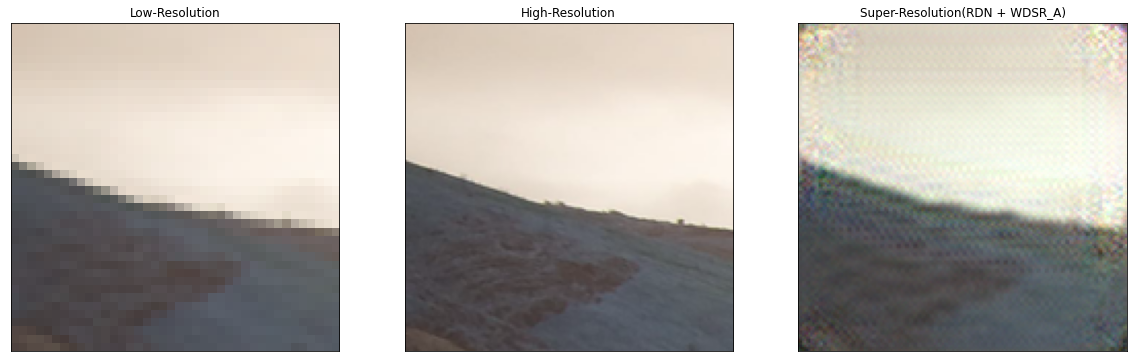

In [ ]:
plot_result_2('LR/0850_lr_4.png', 'LR/0850_hr_4.png', 'LR/0850_sr_4.png')

# Wyniki na całym zbiorze danych

In [ ]:
#przykład dla WDSR_B + RDN 
score_sum = []
ssim_sum = []
elapsed_time = []
for image_id in range (1,900):
    if image_id in range (1,9):
        lr = load_image(f'demo/div2k/images/DIV2K_train_LR_bicubic/X4/000{image_id}x4.png')
        hr = load_image(f'demo/div2k/images/DIV2K_train_HR/000{image_id}.png')
        hr_image_path = f'demo/div2k/images/DIV2K_train_HR/000{image_id}.png'
    if image_id in range (10,99):
        lr = load_image(f'demo/div2k/images/DIV2K_train_LR_bicubic/X4/00{image_id}x4.png')
        hr = load_image(f'demo/div2k/images/DIV2K_train_HR/00{image_id}.png')
        hr_image_path = f'demo/div2k/images/DIV2K_train_HR/00{image_id}.png'
    if image_id in range (100,800):
        lr = load_image(f'demo/div2k/images/DIV2K_train_LR_bicubic/X4/0{image_id}x4.png')
        hr = load_image(f'demo/div2k/images/DIV2K_train_HR/0{image_id}.png')
        hr_image_path = f'demo/div2k/images/DIV2K_train_HR/0{image_id}.png'
    if image_id in range (801,900):
        lr = load_image(f'demo/div2k/images/DIV2K_valid_LR_bicubic/X4/0{image_id}x4.png')
        hr = load_image(f'demo/div2k/images/DIV2K_valid_HR/0{image_id}.png')
        hr_image_path = f'demo/div2k/images/DIV2K_valid_HR/0{image_id}.png'
    
    start_time = time.time() 
    sr_01 = resolve(model_WDSR_B_2, tf.expand_dims(lr, axis=0))[0]
    sr = resolve(model_RDN_2, tf.expand_dims(sr_01, axis=0))[0]
    elapsed_time = time.time() - start_time
    sr_image_path = f'demo/SR/0{image_id}.png'
    cv2.imwrite(sr_image_path, np.float32(sr))
    score = tf.image.psnr(hr, sr, 255)
    ssim_score = ssim(hr_image_path, sr_image_path)
    score_sum.append(score)
    ssim_sum.append(ssim_score)
    elapsed_time_sum.append(elapsed_time)   

print('średnia wartość PSNR:', np.mean(score_sum, axis=0))
print('odchylenie standardowe PSNR:', np.std(score_sum, axis=0))
ssim_sum = np.array(ssim_sum).astype(np.float)
print('średnia wartość SSIM:', np.mean(ssim_sum, axis=0))
print('odchylenie standardowe SSIM:', np.std(ssim_sum, axis=0))
print('średnia wartość czasu przetwarzania:', np.mean(elapsed_time_sum, axis=0))
print('odchylenie standardowe czasu przetwarzania:', np.std(elapsed_time_sum, axis=0))

/content/miary.py:18: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  (score, diff) = compare_ssim(grayA, grayB, full=True)


średnia wartość PSNR: 25.521658
odchylenie standardowe PSNR: 3.3285007
średnia wartość SSIM: 0.7531113691343068
odchylenie standardowe SSIM: 0.09333490594372033
średnia wartość czasu przetwarzania: 0.5940778964015854
odchylenie standardowe czasu przetwarzania: 0.6275069326691923
